<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alanis Caicedo &bull; 12/07/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [24]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# División de datos y validación
from sklearn.model_selection import train_test_split, cross_val_score

# Métricas
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    accuracy_score,
    recall_score,
    f1_score,
    make_scorer
)
# Carga de Archivos
from google.colab import files

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [25]:
# Cargar el archivo desde el equipo usando el selector de archivos
archivo_subido = files.upload()

# Leer el archivo seleccionado y asignar nombres de columnas
columnas = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO",
    "B", "LSTAT", "MEDV"
]

# Obtener nombre del archivo cargado
nombre_archivo = list(archivo_subido.keys())[0]

df = pd.read_csv(
    nombre_archivo,
    delim_whitespace=True,
    header=None,
    names=columnas
)

# Información básica del dataset
print("Número de atributos:", df.shape[1])
print("Nombres de atributos:", list(df.columns))
print("Número de filas:", df.shape[0])

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isna().sum())


Saving housing.data.txt to housing.data (2).txt
Número de atributos: 14
Nombres de atributos: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Número de filas: 506

Valores faltantes por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


/tmp/ipython-input-3125357405.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


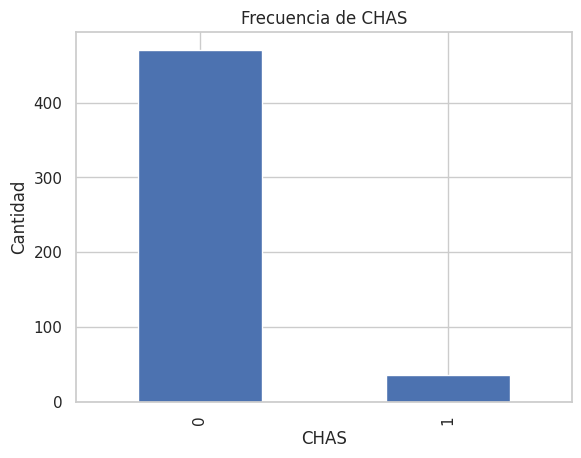

Frecuencia de RAD:
RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64


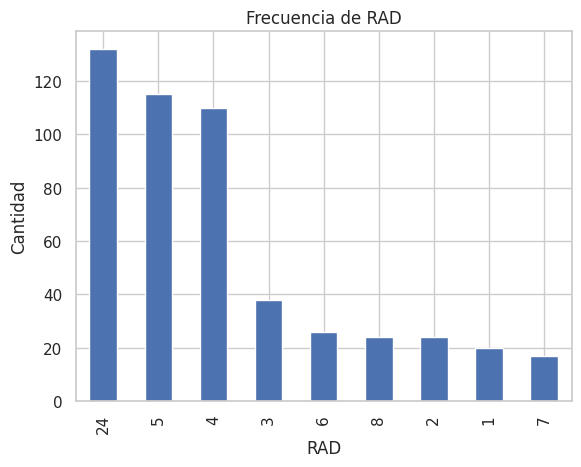


Estadísticos descriptivos de variables numéricas:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   1

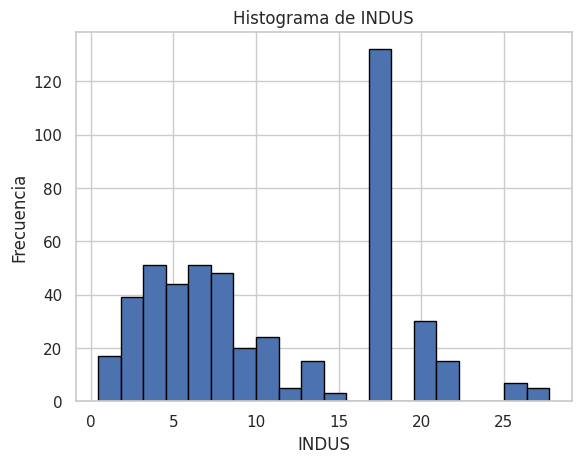

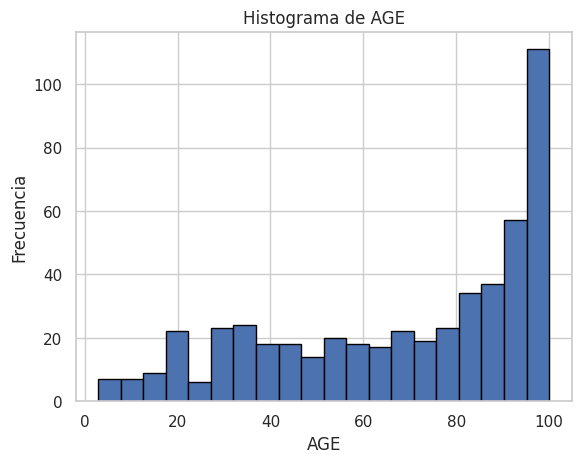

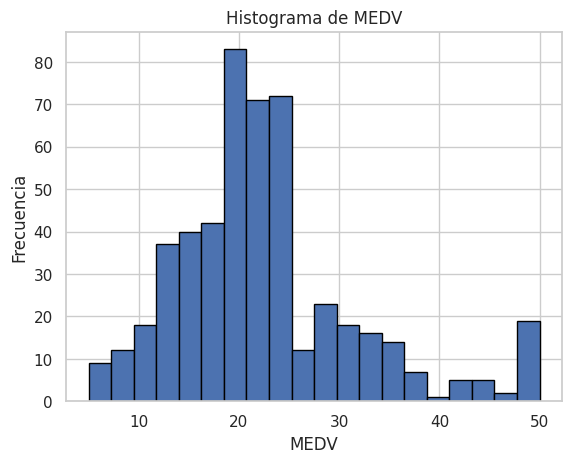

In [26]:
# Frecuencias de variables categóricas
categoricas = ["CHAS", "RAD"]
for col in categoricas:
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts())
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.show()

# Estadísticos descriptivos de variables numéricas
print("\nEstadísticos descriptivos de variables numéricas:")
print(df.describe())

# Histogramas de variables seleccionadas
numericas_hist = ["INDUS", "AGE", "MEDV"]
for col in numericas_hist:
    plt.figure()
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

## Análisis Estadístico Básico

### Variables categóricas
La variable **CHAS** está desbalanceada, ya que la mayoría de valores son 0 y solo una pequeña parte corresponde a 1. Esto es importante para la clasificación porque la clase positiva es minoritaria.  
En **RAD**, algunos valores aparecen con mucha más frecuencia que otros (24, 5 y 4), lo que muestra que el acceso a autopistas no es uniforme entre las zonas.

### Variables numéricas
Los estadísticos descriptivos muestran bastante variación entre las variables. **CRIM** presenta valores extremos, lo que se refleja en su alta desviación estándar. **RM** tiene una media cercana a 6, indicando un tamaño promedio de las viviendas. **AGE** muestra que muchas casas son antiguas, y **LSTAT** tiene una dispersión amplia que refleja diferencias socioeconómicas entre vecindarios.

### Histogramas
El histograma de **INDUS** muestra que la mayoría de zonas tienen niveles industriales bajos o medios. En **AGE**, la distribución está cargada hacia valores altos, lo que coincide con viviendas más antiguas. En **MEDV**, los precios se concentran entre 15 y 25, y se observa un límite superior en 50 debido al tope del dataset original.


### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

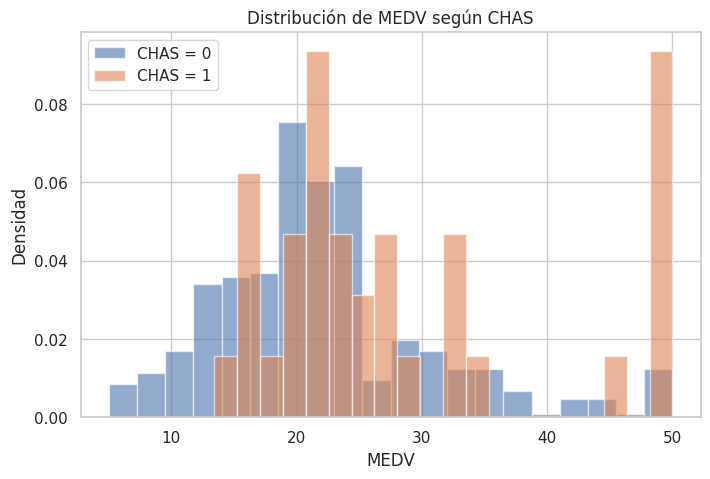

In [27]:
# Histograma de MEDV separado por la clase CHAS
clases = df["CHAS"].unique()

plt.figure(figsize=(8,5))
for c in clases:
    plt.hist(df[df["CHAS"] == c]["MEDV"],
             bins=20, density=True, alpha=0.6,
             label=f"CHAS = {c}")

plt.title("Distribución de MEDV según CHAS")
plt.xlabel("MEDV")
plt.ylabel("Densidad")
plt.legend()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

### Análisis: relación entre CHAS y MEDV

A partir de los histogramas, se observa que las viviendas cercanas al río (**CHAS = 1**) tienden a concentrarse un poco más en valores medios y altos de **MEDV**, e incluso aparecen con mayor frecuencia cerca del valor máximo permitido (50). Esto sugiere que CHAS podría tener cierto peso en la predicción del precio, ya que vivir cerca del río parece estar asociado a viviendas más costosas.  
Sin embargo, las distribuciones se superponen bastante, por lo que el efecto de CHAS no parece ser muy fuerte comparado con otras variables que seguramente tendrán una relación más marcada con MEDV.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [28]:
# Correlación de todas las variables numéricas con MEDV
correlaciones = df.corr(numeric_only=True)["MEDV"].sort_values(ascending=False)
print(correlaciones)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


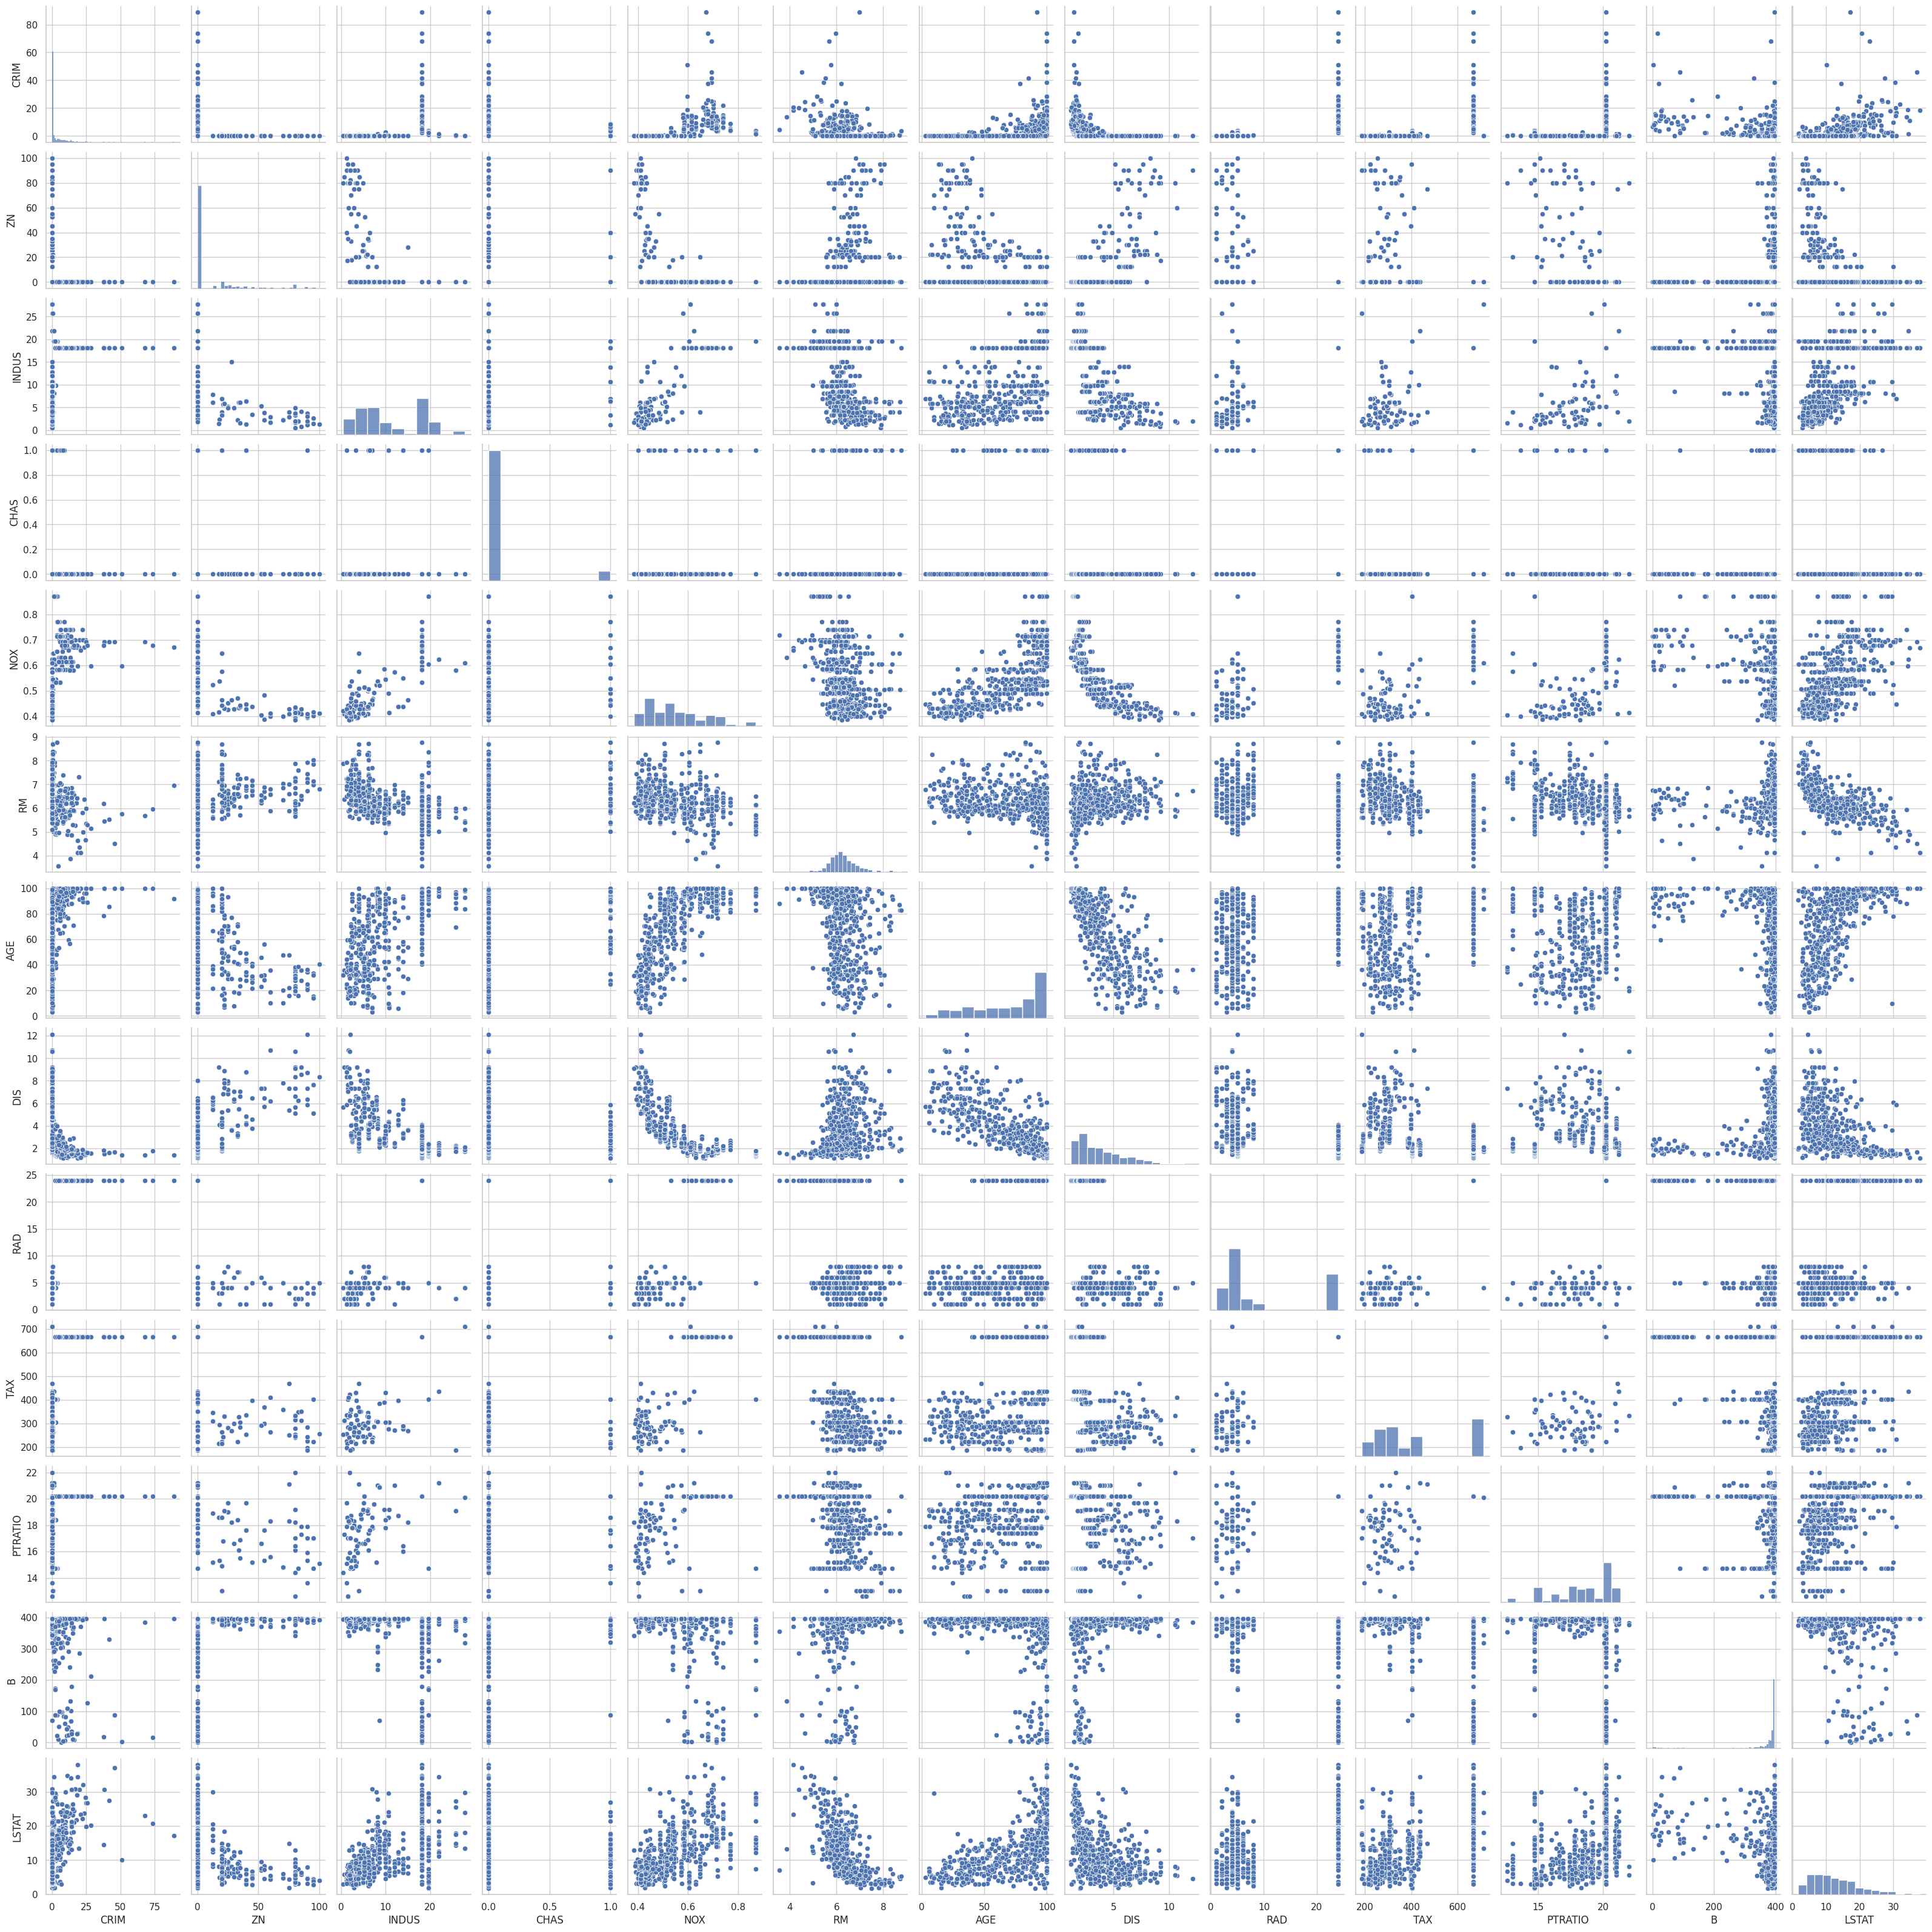

In [29]:
# Pairplot de las variables numéricas sin incluir MEDV
num_vars = df.select_dtypes(include=["float64", "int64"]).columns
num_vars_sin_medv = num_vars.drop("MEDV")

sns.pairplot(df[num_vars_sin_medv], diag_kind="hist")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


Más correlacionadas con MEDV: ['LSTAT', 'RM']
Menos correlacionadas con MEDV: ['DIS', 'CHAS']


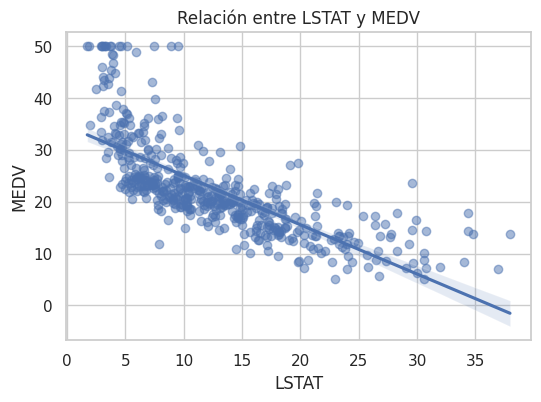

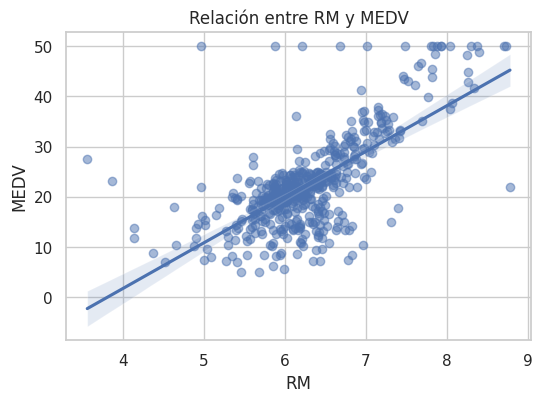

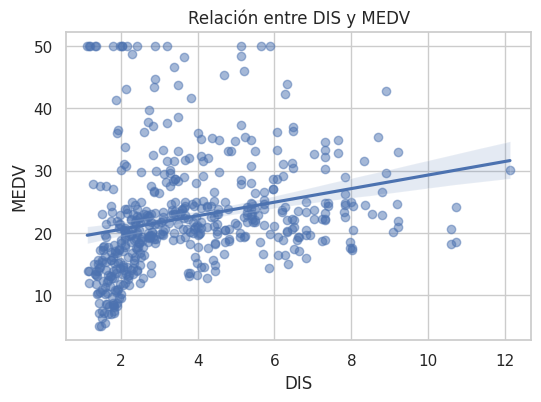

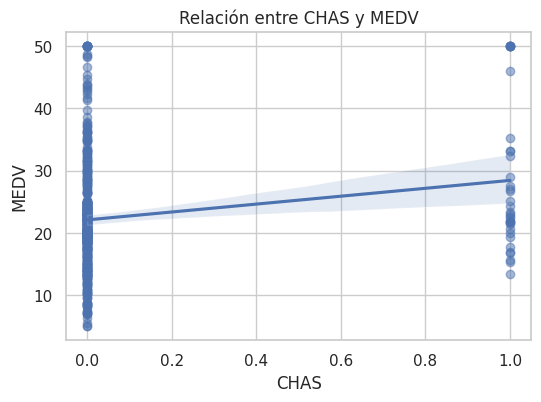

In [30]:
# Correlaciones absolutas con MEDV
corr_abs = df.corr(numeric_only=True)["MEDV"].abs().sort_values(ascending=False)

# Seleccionar dos más correlacionadas (excluyendo MEDV)
mas_fuertes = corr_abs.index[1:3]

# Seleccionar dos menos correlacionadas
menos_fuertes = corr_abs.index[-2:]

print("Más correlacionadas con MEDV:", list(mas_fuertes))
print("Menos correlacionadas con MEDV:", list(menos_fuertes))

# Scatterplots con regresión lineal


atributos = list(mas_fuertes) + list(menos_fuertes)

for col in atributos:
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[col], y=df["MEDV"], scatter_kws={"alpha":0.5})
    plt.title(f"Relación entre {col} y MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


### Análisis de las correlaciones visualizadas

En los gráficos se puede confirmar lo que ya se observaba numéricamente. La relación entre **LSTAT y MEDV** muestra una tendencia claramente negativa: a medida que aumenta el porcentaje de población con bajo nivel socioeconómico, el valor de las viviendas disminuye. Esto coincide con su alta correlación negativa. Por otro lado, **RM** presenta una tendencia positiva marcada, lo que indica que las viviendas con más habitaciones suelen tener mayor valor, coherente con su fuerte correlación positiva.

En contraste, **DIS** muestra una relación mucho más difusa: aunque existe una ligera tendencia creciente, la dispersión es alta y no se aprecia una conexión fuerte con MEDV. Finalmente, **CHAS** prácticamente no evidencia una relación lineal clara, lo que coincide con su correlación muy baja. En general, los gráficos respaldan la interpretación cuantitativa de que LSTAT y RM son buenos predictores de MEDV, mientras que DIS y CHAS aportan menos información para explicar la variabilidad del precio.


---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


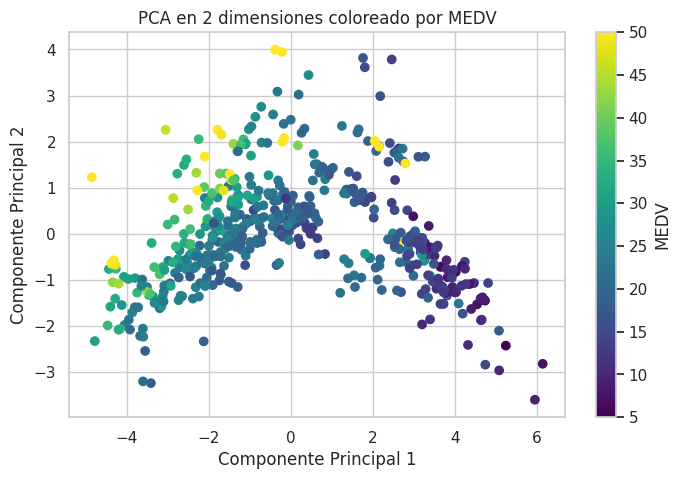

In [31]:


# Separamos atributos (X) y la variable objetivo (y)
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Estandarizamos las variables (PCA necesita escalamiento)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficamos las dos componentes principales coloreando según MEDV
plt.figure(figsize=(8,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.colorbar(scatter, label="MEDV")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA en 2 dimensiones coloreado por MEDV")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


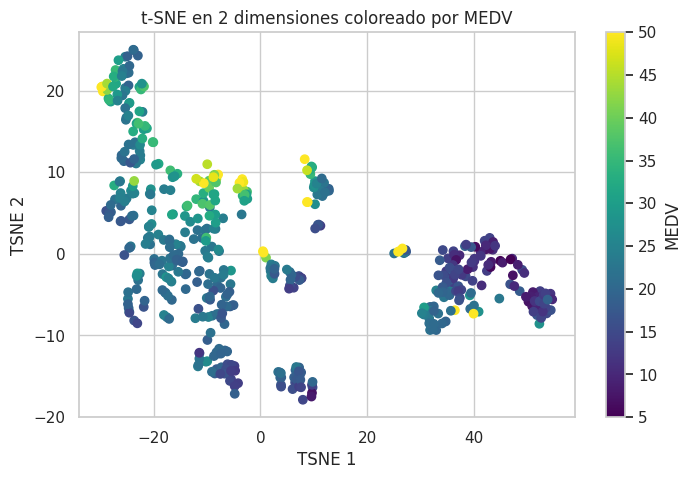

In [32]:


# Usamos las mismas variables X_scaled y y definidas antes
tsne = TSNE(n_components=2, learning_rate=200, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Gráfico de las dos dimensiones de t-SNE coloreadas por MEDV
plt.figure(figsize=(8,5))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="viridis")
plt.colorbar(scatter, label="MEDV")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("t-SNE en 2 dimensiones coloreado por MEDV")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


### Análisis de PCA vs t-SNE

Al comparar ambos métodos, se observan diferencias claras en la manera en que representan la estructura del dataset. En el caso de **PCA**, las dos primeras componentes muestran una distribución más continua y ordenada, donde los valores de MEDV cambian gradualmente a lo largo de la primera componente. Esto es coherente con el hecho de que PCA captura variabilidad global y mantiene relaciones lineales entre las variables.

Por otro lado, **t-SNE** genera una representación mucho más fragmentada, formando grupos o “islas” que no aparecen con PCA. Esto se debe a que t-SNE prioriza preservar relaciones locales, agrupando puntos que son similares en el espacio original. En esta representación, se aprecia que dentro de algunos grupos los valores de MEDV tienden a ser más homogéneos, aunque la escala global pierde interpretación.

En resumen, PCA permite ver una tendencia más general relacionada con MEDV, mientras que t-SNE resalta estructuras locales que podrían ser útiles para identificar patrones o posibles subgrupos en el dataset.


---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [33]:


# Separación de variables
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Split en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)

# Modelo de regresión lineal
model = LinearRegression()

# --- Validación cruzada para R2 ---
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
r2_mean = cv_r2.mean()
r2_std = cv_r2.std()

# --- Validación cruzada para MAE ---
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae = cross_val_score(model, X_train, y_train, cv=5, scoring=mae_scorer)

# Como MAE se devuelve en negativo, lo convertimos a positivo
cv_mae_pos = -cv_mae
mae_mean = cv_mae_pos.mean()
mae_std = cv_mae_pos.std()

print("R2 promedio:", r2_mean)
print("R2 desviación estándar:", r2_std)
print("MAE promedio:", mae_mean)
print("MAE desviación estándar:", mae_std)


Tamaño de X_train: (404, 13)
Tamaño de X_test: (102, 13)
R2 promedio: 0.751455574522408
R2 desviación estándar: 0.048793673223333243
MAE promedio: 3.2085900284186097
MAE desviación estándar: 0.24272412225860618


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [34]:
# Usamos las dos componentes generadas por PCA
X_pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
y = df["MEDV"]

# Split en train y test con random_state = 9
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_df, y, test_size=0.2, random_state=9
)

print("Tamaño X_train_pca:", X_train_pca.shape)
print("Tamaño X_test_pca:", X_test_pca.shape)

# Modelo de regresión lineal
model_pca = LinearRegression()

# --- Validación cruzada para R2 ---
cv_r2_pca = cross_val_score(model_pca, X_train_pca, y_train_pca, cv=5, scoring="r2")
r2_pca_mean = cv_r2_pca.mean()
r2_pca_std = cv_r2_pca.std()

# --- Validación cruzada para MAE ---
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae_pca = cross_val_score(model_pca, X_train_pca, y_train_pca, cv=5, scoring=mae_scorer)

# MAE en positivo
cv_mae_pca_pos = -cv_mae_pca
mae_pca_mean = cv_mae_pca_pos.mean()
mae_pca_std = cv_mae_pca_pos.std()

print("R2 promedio (PCA):", r2_pca_mean)
print("R2 desviación estándar (PCA):", r2_pca_std)
print("MAE promedio (PCA):", mae_pca_mean)
print("MAE desviación estándar (PCA):", mae_pca_std)


Tamaño X_train_pca: (404, 2)
Tamaño X_test_pca: (102, 2)
R2 promedio (PCA): 0.433693009429446
R2 desviación estándar (PCA): 0.12924885630441607
MAE promedio (PCA): 4.815836036049063
MAE desviación estándar (PCA): 0.8053885781000021


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


### Análisis de los resultados con y sin PCA

El modelo entrenado con el dataset original obtiene un rendimiento claramente superior: presenta un R² promedio cercano a 0.75 y un MAE alrededor de 3.2, mientras que el modelo usando solo las dos componentes PCA llega a un R² de aproximadamente 0.43 y un MAE mayor (cerca de 4.8). Esto indica que la reducción a dos dimensiones provoca una pérdida de información relevante para predecir MEDV.

Este resultado tiene sentido porque PCA busca maximizar la variabilidad global, no necesariamente la información más útil para la variable objetivo. Por eso, aunque las dos primeras componentes capturan buena parte de la estructura del dataset, no explican lo suficiente como para sostener el rendimiento de un modelo de regresión lineal.

Además, el comportamiento coincide con lo observado en el ejercicio 3: las correlaciones fuertes con MEDV provienen de atributos específicos como LSTAT y RM. Al reducir el dataset a dos componentes, estas relaciones directas se diluyen, afectando el desempeño predictivo. Por eso es coherente que el modelo original funcione mejor.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [35]:


# Entrenamos el mejor modelo con todos los datos de entrenamiento
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
y_pred = best_model.predict(X_test)

# Cálculo de métricas
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("R2 en test:", r2_test)
print("MAE en test:", mae_test)


R2 en test: 0.5785415472763393
MAE en test: 3.7807629091749733


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


### Análisis de las métricas para distintos perfiles

Para comunicar los resultados a un ejecutivo de una inmobiliaria, la métrica más útil es **MAE**, porque expresa el error promedio en unidades reales: miles de dólares. Un MAE cercano a 3.8 significa que, en promedio, el modelo se equivoca en unos 3.8 mil dólares al estimar el precio de una vivienda. Esta interpretación es intuitiva y permite evaluar rápidamente si el nivel de error es aceptable para decisiones comerciales.

En cambio, para un analista matemático, es más apropiado usar **R²**, ya que mide qué proporción de la variabilidad del precio está siendo explicada por el modelo. Un valor de R² cercano a 0.58 indica que el modelo captura un poco más de la mitad de la variación total, lo cual es relevante desde un punto de vista estadístico y técnico. Este tipo de métrica ayuda al analista a evaluar la estructura del modelo y a compararlo con alternativas más avanzadas.


### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [36]:


# Variables
X = df.drop("CHAS", axis=1)
y = df["CHAS"]

# Split en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)

# Modelo K-Means (k=2 porque CHAS tiene dos clases: 0 y 1)
kmeans = KMeans(n_clusters=2, random_state=9)
kmeans.fit(X_train)

# Predicciones de clúster
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test)

# Asignamos cada clúster a la clase real más frecuente (mapeo)
cluster_to_class = {}
for c in np.unique(train_clusters):
    mask = train_clusters == c
    most_common = y_train[mask].mode()[0]
    cluster_to_class[c] = most_common

# Convertimos predicciones de clúster a predicciones de clase
y_pred = np.array([cluster_to_class[c] for c in test_clusters])

# Métricas: precisión, sensibilidad y F1
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)        # sensibilidad
f1 = f1_score(y_test, y_pred)

print("Precisión:", acc)
print("Sensibilidad:", rec)
print("F1-score:", f1)


Tamaño X_train: (404, 13)
Tamaño X_test: (102, 13)
Precisión: 0.9215686274509803
Sensibilidad: 0.0
F1-score: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [37]:
# Dataset reducido a 2 componentes PCA
X_pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
y = df["CHAS"]

# Split en train y test con random_state = 9
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_df, y, test_size=0.2, random_state=9
)

print("Tamaño X_train_pca:", X_train_pca.shape)
print("Tamaño X_test_pca:", X_test_pca.shape)

# K-Means (k=2)
kmeans_pca = KMeans(n_clusters=2, random_state=9)
kmeans_pca.fit(X_train_pca)

# Clústeres predichos
train_clusters_pca = kmeans_pca.labels_
test_clusters_pca = kmeans_pca.predict(X_test_pca)

# Mapeo de clúster → clase CHAS más frecuente
cluster_to_class_pca = {}
for c in np.unique(train_clusters_pca):
    mask = train_clusters_pca == c
    most_common = y_train_pca[mask].mode()[0]
    cluster_to_class_pca[c] = most_common

# Predicciones finales
y_pred_pca = np.array([cluster_to_class_pca[c] for c in test_clusters_pca])

# Métricas
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
rec_pca = recall_score(y_test_pca, y_pred_pca)      # sensibilidad
f1_pca = f1_score(y_test_pca, y_pred_pca)

print("Precisión (PCA):", acc_pca)
print("Sensibilidad (PCA):", rec_pca)
print("F1-score (PCA):", f1_pca)


Tamaño X_train_pca: (404, 2)
Tamaño X_test_pca: (102, 2)
Precisión (PCA): 0.9215686274509803
Sensibilidad (PCA): 0.0
F1-score (PCA): 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


### Análisis de las métricas de clasificación

Para un ejecutivo de una inmobiliaria, la métrica más adecuada sería la **precisión**, ya que indica qué porcentaje de predicciones totales son correctas. Es una métrica fácil de interpretar y se alinea con decisiones operativas básicas. En este caso, la precisión es alta (≈92%), lo cual podría dar la impresión de que el modelo funciona bien.

Sin embargo, para un analista matemático la métrica más útil sería la **sensibilidad** o el **F1-score**, porque permiten evaluar qué tan bien el modelo identifica correctamente la clase minoritaria (CHAS = 1). Ambos valores son 0, lo que evidencia que el modelo nunca predice la clase positiva. Esto indica un problema serio: el modelo no discrimina entre categorías y simplemente clasifica todo como 0.

El modelo, por lo tanto, es mejor **acertando** (debido al desbalance de clases) pero no **discriminando**. Esto significa que acierta mucho solo porque la mayoría de las viviendas no están junto al río, pero es incapaz de identificar correctamente los casos donde sí lo están. Este comportamiento es típico cuando se usa un método no supervisado como K-Means en un problema con clases desbalanceadas y con fronteras poco separables.
